# Number Plate Detection


In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract==0.3.9

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 7 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 0s (11.1 MB/s)
debconf: unable to initial

In [2]:
!pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!sudo apt-get install qt5-default

Reading package lists... Done
Building dependency tree       
Reading state information... Done
qt5-default is already the newest version (5.9.5+dfsg-0ubuntu2.6).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.


In [4]:
import os
import sys
import numpy as np
import cv2
import imutils
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
from pytesseract import pytesseract



In [5]:
# Image Reading
def image_read_image(imagePath):
    image = cv2.imread(imagePath)
    return image

In [6]:

# Original Image to Converting Grayscale
def convertImg2Grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [7]:

# Removing Noise From image using Bilateral Filter
def remove_noise(img):
    return cv2.bilateralFilter(img, 11, 17, 17) 

In [8]:
# Canny - Edge - Detection
def edge_detection(image):
    cany_img = cv2.Canny(image, 30, 200)
    return cany_img

In [9]:
# Identifying the edges by locating the contours of the edge-dilated image

def finding_Contours(edgeImg, img):
    edgeCopy = edgeImg.copy()
    cnts,new = cv2.findContours(edgeCopy, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    image1=img.copy()
    cv2.drawContours(image1,cnts,-1,(0,255,0),1)
    displayImage(image1, "contours")
    return cnts

# The contours on the number plate should be smaller than other contours in order to solve this issue.
# So, we group the contours according to their area and select the ten lowest contours.

In [10]:
# Create the approximate polygon in green on the image.
def create_top_countors(img, countors):
    cnts = sorted(countors, key = cv2.contourArea, reverse = True) [:30]
    image2 = img.copy()
    cv2.drawContours(image2,cnts,-1,(0,255,0),1)
    displayImage(image2, "Top 30 contours")
    
    return cnts


In [11]:
def approximatedPolygon(img, countors):
  screenCnt = None
  i = 7
  for c in countors:
        perimeter = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.018 * perimeter, True)
        if len(approx) == 4: 
                screenCnt = approx
                x,y,w,h = cv2.boundingRect(c) 
                new_img = img[y:y+h,x:x+w]
                cv2.imwrite('finalOutputImage.png',new_img)
                i+=1
                break
  return screenCnt

In [12]:
def final_cropped_image():
  cropedImg = image_read_image('/content/finalOutputImage.png')
  return cropedImg

In [13]:
def displayImage(image, name):
  plt.figure(figsize=(10, 10))
  plt.title(name)
  plt.imshow(image)
  plt.show()

In [14]:
def getNumberPlateTextFromImage():
  
  # extracting text from the image using image_to_string() function
  text = pytesseract.image_to_string('/content/finalOutputImage.png')
  # return extracted text

  return text

In [15]:
def getNumberplateFromImage(imgPath):
  image = image_read_image(imgPath)
  image = imutils.resize(image, width=300 )
  displayImage(image, 'original Image')

  gray_image = convertImg2Grayscale(image)
  displayImage(gray_image, "greyed image")

  noiseRemovedImage = remove_noise(gray_image)
  displayImage(noiseRemovedImage, "smoothened image")

  edgeDetectedImage = edge_detection(noiseRemovedImage)
  displayImage(edgeDetectedImage, "Edge detection")

  edgeCopy = edgeDetectedImage.copy()
  cnts,new = cv2.findContours(edgeCopy, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
  image1=image.copy()
  cv2.drawContours(image1,cnts,-1,(0,255,0),1)
  displayImage(image1, "contours")

  cnts = sorted(cnts, key = cv2.contourArea, reverse = True) [:30]
  image2 = image.copy()
  cv2.drawContours(image2,cnts,-1,(0,255,0),1)
  displayImage(image2, "Top 30 contours")

  screenCnt = approximatedPolygon(image, cnts)
  cv2.drawContours(image, [screenCnt], -1, (0, 255, 0), 3)
  displayImage(image,"image with detected license plate")

  output_image = final_cropped_image()

  return output_image


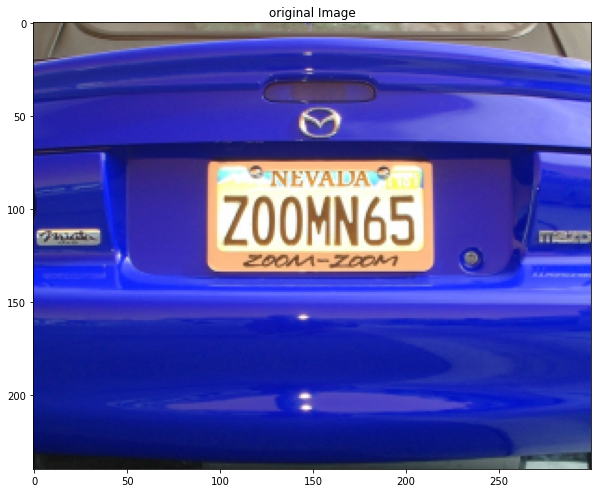

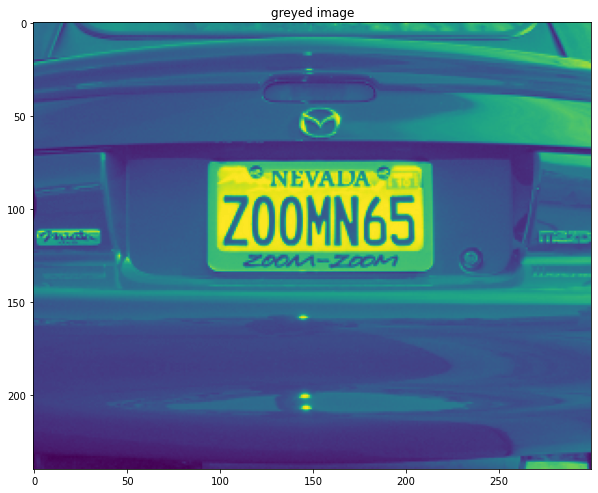

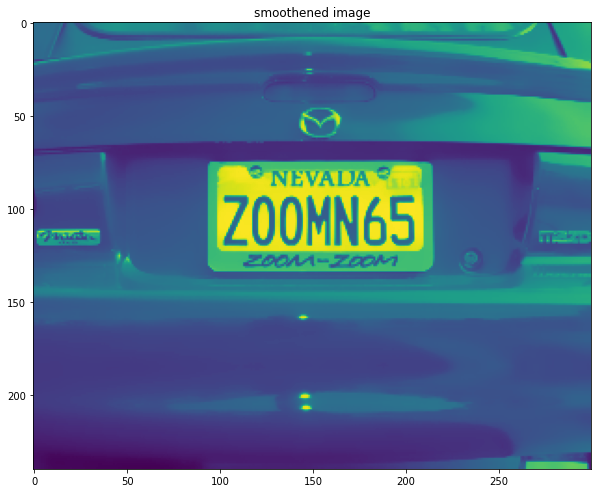

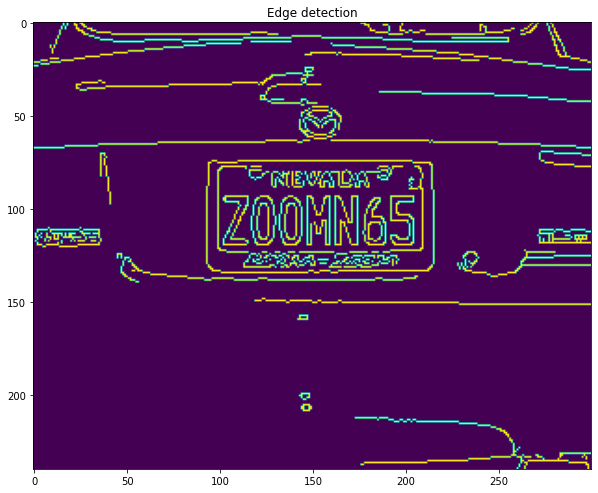

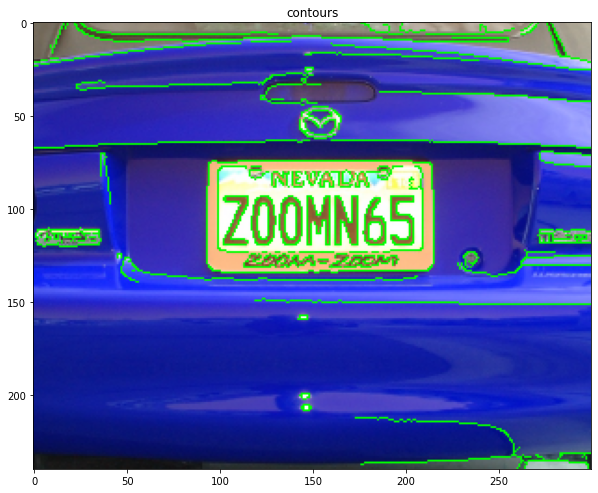

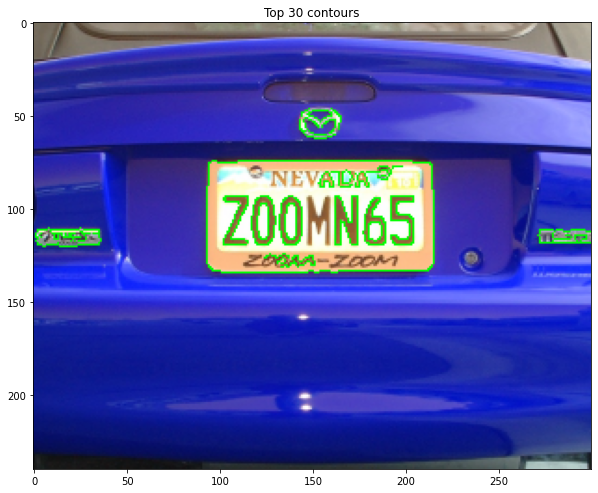

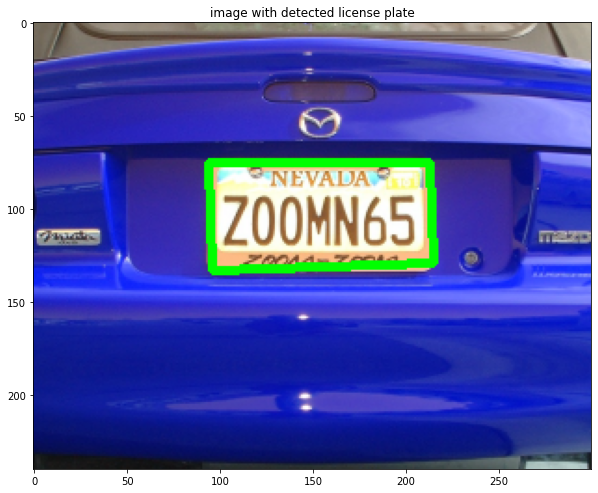

In [19]:
croppedImg = getNumberplateFromImage('/content/26.png')

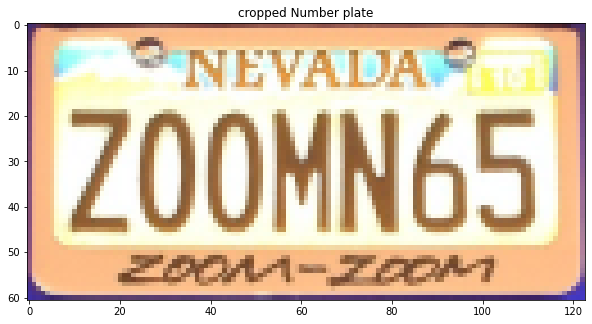

In [20]:
displayImage(croppedImg,"cropped Number plate" )